In [12]:
%run -i 'python_files/sql_queries.py'

In [13]:
movie_top_characters = cleaning.reading_csv("movie_top_characters")
movie_top_characters.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
marvel_sentiment = cleaning.reading_csv("marvel_sentiment")
marvel_sentiment.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
engine = connection_sql(password_sql, "marvel")

In [16]:
movie_top_characters.to_sql("top_characters", if_exists="append", con=engine, index=False)

40

In [17]:
marvel_sentiment.to_sql("sentiment", if_exists="append", con=engine, index=False)

15724

In [18]:
ranking_avg_words = pd.read_sql_query("""
SELECT full_name, avg_words_per_line
    FROM marvel.top_characters
    ORDER BY avg_words_per_line DESC;
""", engine)
ranking_avg_words[:5]

,full_name,avg_words_per_line
0,EGO,27
1,JUSTIN HAMMER,27
2,EGO,27
3,JUSTIN HAMMER,27
4,HELA,21


In [19]:
ranking_avg_words.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/ranking_avg_words.csv')

In [20]:
ranking_avg_lines = pd.read_sql_query("""
SELECT full_name, avg_lines_per_movie
    FROM marvel.top_characters
    ORDER BY avg_lines_per_movie DESC;
""", engine)
ranking_avg_lines[:5]

,full_name,avg_lines_per_movie
0,TONY STARK,198
1,TONY STARK,198
2,PETER PARKER,137
3,PETER PARKER,137
4,THOR,123


In [21]:
ranking_avg_lines.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/ranking_avg_lines.csv')

In [22]:
total_words_movie = pd.read_sql_query("""
SELECT movie, SUM(words) AS total_words
    FROM marvel.sentiment
    GROUP BY movie
    ORDER BY total_words DESC;
""", engine)
total_words_movie[:5]

,movie,total_words
0,Spider-Man: Homecoming,24428.0
1,Avengers: Endgame,23354.0
2,Iron Man 2,22684.0
3,Iron Man 3,21750.0
4,The Avengers,21286.0


In [23]:
total_words_movie.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/total_words_movie.csv')

In [24]:
words_character = pd.read_sql_query("""
SELECT full_name, SUM(words) AS total_words
    FROM marvel.sentiment
    GROUP BY full_name
    ORDER BY total_words DESC;
""", engine)
words_character[:5]

,full_name,total_words
0,TONY STARK,45180.0
1,THOR,18974.0
2,STEVE ROGERS,17306.0
3,PETER PARKER,11034.0
4,NATASHA ROMANOFF,9378.0


In [25]:
words_character.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/words_character.csv')

In [26]:
sentiment_avg_by_year = pd.read_sql_query("""
SELECT year, AVG(compound) AS avg_compound
    FROM marvel.sentiment
    GROUP BY year
    ORDER BY avg_compound DESC;
""", engine)
sentiment_avg_by_year[:5]

,year,avg_compound
0,2010,0.104264
1,2008,0.070851
2,2016,0.057405
3,2015,0.050207
4,2017,0.047619


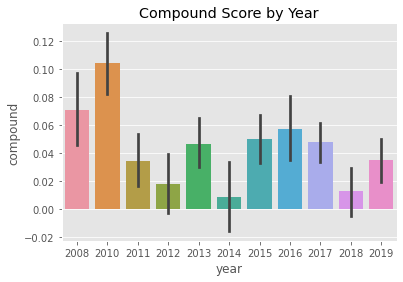

In [27]:
ax = sns.barplot(data=marvel_sentiment, x='year', y='compound')
ax.set_title('Compound Score by Year')
plt.show()

In [28]:
sentiment_avg_by_year.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/sentiment_avg_by_year.csv')

In [29]:
sentiment_2010 = pd.read_sql_query("""
SELECT year, movie, AVG(compound) AS avg_compound
    FROM marvel.sentiment
    WHERE year = 2010
    GROUP BY movie
    ORDER BY avg_compound DESC;
""", engine)
sentiment_2010

,year,movie,avg_compound
0,2010,Iron Man 2,0.104264


In [30]:
sentiment_2010.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/sentiment_2010.csv')

In [31]:
sentiment_ironman2 = pd.read_sql_query("""
SELECT full_name, line, movie, compound
    FROM marvel.sentiment
    WHERE movie LIKE "Iron Man 2"
    ORDER BY compound DESC;
""", engine)
sentiment_ironman2

,full_name,line,movie,compound
0,JUSTIN HAMMER,"Well, you’re talking to the right guy. Clarid...",Iron Man 2,0.9920
1,JUSTIN HAMMER,"Well, you’re talking to the right guy. Clarid...",Iron Man 2,0.9920
2,JUSTIN HAMMER,Hey. There he is. There he is. What an absolut...,Iron Man 2,0.9862
3,JUSTIN HAMMER,Hey. There he is. There he is. What an absolut...,Iron Man 2,0.9862
4,TONY STARK,"Please, it’s not about me. It’s not about you...",Iron Man 2,0.9834
...,...,...,...,...
1975,JAMES RHODES,"It’s the kill box, Tony. Okay This is where yo...",Iron Man 2,-0.8271
1976,JARVIS,Query complete sir. Anton Vanko was a Soviet p...,Iron Man 2,-0.8591
1977,JARVIS,Query complete sir. Anton Vanko was a Soviet p...,Iron Man 2,-0.8591
1978,JUSTIN HAMMER,Yeah. That’s what I’m talking about. Thanks fo...,Iron Man 2,-0.8858


In [32]:
sentiment_ironman2.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/sentiment_ironman2.csv')

In [33]:
movies_per_year = pd.read_sql_query("""
SELECT DISTINCT(movie), year
    FROM marvel.sentiment;
""", engine)
movies_per_year[:5]

,movie,year
0,Iron Man,2008
1,Iron Man 2,2010
2,Thor,2011
3,Captain America: The First Avenger,2011
4,The Avengers,2012


In [34]:
movies_per_year.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/movies_per_year.csv')

In [35]:
sentiment_avg_movie = pd.read_sql_query("""
SELECT movie, AVG(compound) AS avg_compound
    FROM marvel.sentiment
    GROUP BY movie
    ORDER BY avg_compound DESC;
""", engine)
sentiment_avg_movie[:5]

,movie,avg_compound
0,Iron Man 2,0.104264
1,Spider-Man: Homecoming,0.083329
2,Iron Man,0.070851
3,Iron Man 3,0.064887
4,Ant-Man,0.061948


In [36]:
sentiment_avg_movie.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/sentiment_avg_movie.csv')

In [37]:
sentiment_endgame = pd.read_sql_query("""
SELECT full_name, line, movie, compound
    FROM marvel.sentiment
    WHERE movie LIKE "Avengers: Endgame"
    ORDER BY compound DESC;
""", engine)
sentiment_endgame

,full_name,line,movie,compound
0,TONY STARK,Everybody wants a happy ending. But it doesn’t...,Avengers: Endgame,0.9865
1,TONY STARK,Everybody wants a happy ending. But it doesn’t...,Avengers: Endgame,0.9865
2,THOR,"Stop. Stop. I know you think I’m down here, ...",Avengers: Endgame,0.9428
3,THOR,"Stop. Stop. I know you think I’m down here, ...",Avengers: Endgame,0.9428
4,TONY STARK,Good job. I’m saved. I wish you were coming ...,Avengers: Endgame,0.9371
...,...,...,...,...
2171,THOR,Why are we talking as if she’s dead? We have ...,Avengers: Endgame,-0.8945
2172,BRUCE BANNER,"Uh, one, because that’s horrible. And, two, ki...",Avengers: Endgame,-0.9022
2173,BRUCE BANNER,"Uh, one, because that’s horrible. And, two, ki...",Avengers: Endgame,-0.9022
2174,THOR,Scared? Why would I be scared of that guy? I...,Avengers: Endgame,-0.9514


In [38]:
sentiment_endgame.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/sentiment_endgame.csv')

In [39]:
top_10_actors = pd.read_sql_query("""
SELECT full_name, movie_appearances
    FROM marvel.top_characters
    ORDER BY movie_appearances DESC
    LIMIT 10;
""", engine)
top_10_actors

,full_name,movie_appearances
0,NATASHA ROMANOFF,10
1,STEVE ROGERS,10
2,STEVE ROGERS,10
3,NATASHA ROMANOFF,10
4,TONY STARK,9
5,TONY STARK,9
6,JAMES RHODES,8
7,JAMES RHODES,8
8,THOR,7
9,BRUCE BANNER,7


In [40]:
top_10_actors.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/top_10_actors.csv')

In [41]:
lines_vs_movies = pd.read_sql_query("""
SELECT full_name, movie_appearances, total_lines
    FROM marvel.top_characters
    ORDER BY total_lines DESC
    LIMIT 10;
""", engine)
lines_vs_movies

,full_name,movie_appearances,total_lines
0,TONY STARK,9,1788
1,TONY STARK,9,1788
2,STEVE ROGERS,10,977
3,STEVE ROGERS,10,977
4,THOR,7,863
5,THOR,7,863
6,PETER PARKER,4,551
7,PETER PARKER,4,551
8,NATASHA ROMANOFF,10,498
9,NATASHA ROMANOFF,10,498


In [42]:
lines_vs_movies.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/lines_vs_movies.csv')

In [43]:
total_lines = pd.read_sql_query("""
SELECT full_name, total_lines
    FROM marvel.top_characters
    WHERE Avengers_Endgame > 0
    ORDER BY total_lines DESC
    LIMIT 10;
""", engine)
total_lines

,full_name,total_lines
0,TONY STARK,1788
1,TONY STARK,1788
2,STEVE ROGERS,977
3,STEVE ROGERS,977
4,THOR,863
5,THOR,863
6,PETER PARKER,551
7,PETER PARKER,551
8,NATASHA ROMANOFF,498
9,NATASHA ROMANOFF,498


In [44]:
total_lines.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/total_lines.csv')

In [48]:
avg_words_vs_movie_app = pd.read_sql_query("""
SELECT DISTINCT(full_name), movie_appearances, total_lines, avg_words_per_line
    FROM marvel.top_characters
    ORDER BY avg_words_per_line DESC
    LIMIT 10;
""", engine)
avg_words_vs_movie_app

,full_name,movie_appearances,total_lines,avg_words_per_line
0,EGO,1,57,27
1,JUSTIN HAMMER,1,82,27
2,HELA,1,32,21
3,ALEXANDER PIERCE,2,60,19
4,ULYSSES KLAUE,2,40,18
5,ODIN,3,136,16
6,HEIMDALL,5,53,15
7,ULTRON,1,81,14
8,LOKI,6,327,12
9,M'BAKU,2,23,12


In [46]:
avg_words_vs_movie_app.to_csv('/Users/lauurasarabia/Ironhack/projects/project4/queries/avg_words_vs_movie_app.csv')